In [212]:
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns

Checking for the correct encoding to read the csv file

In [213]:
# Reading the CSV file with different encodings
encodings_to_try = ["utf-8", "ISO-8859-1", "cp1252", "unicode_escape"]

for encoding in encodings_to_try:
    try:
        df = pd.read_csv(r'C:\Users\ishaan phaye\Desktop\VS Code\Data Science Projects\Diwali sales data analysis using Python\Diwali Sales Data.csv', encoding=encoding)
        print(f"File successfully read with encoding: {encoding}")
        break  # Exit the loop if successful
    except UnicodeDecodeError:
        print(f"Failed to read with encoding: {encoding}")

Failed to read with encoding: utf-8
File successfully read with encoding: ISO-8859-1


In [214]:
df=pd.read_csv(r'C:\Users\ishaan phaye\Desktop\VS Code\Data Science Projects\Diwali sales data analysis using Python\Diwali Sales Data.csv',encoding='ISO-8859-1')
df.shape

(11251, 15)

## Data Cleaning

In [215]:
df.head(5)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [217]:
# Drop Null/unrelated columns
df.drop(['Status','unnamed1'],axis=1,inplace=True)

In [218]:
# Check if null values exist, and where
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [219]:
df.shape

(11251, 13)

In [220]:
df.dropna(inplace=True)

In [221]:
# Change float data to int for better readability
df['Amount']=df['Amount'].astype('int')

In [222]:
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


## Exploratory Data Analysis

### Gender

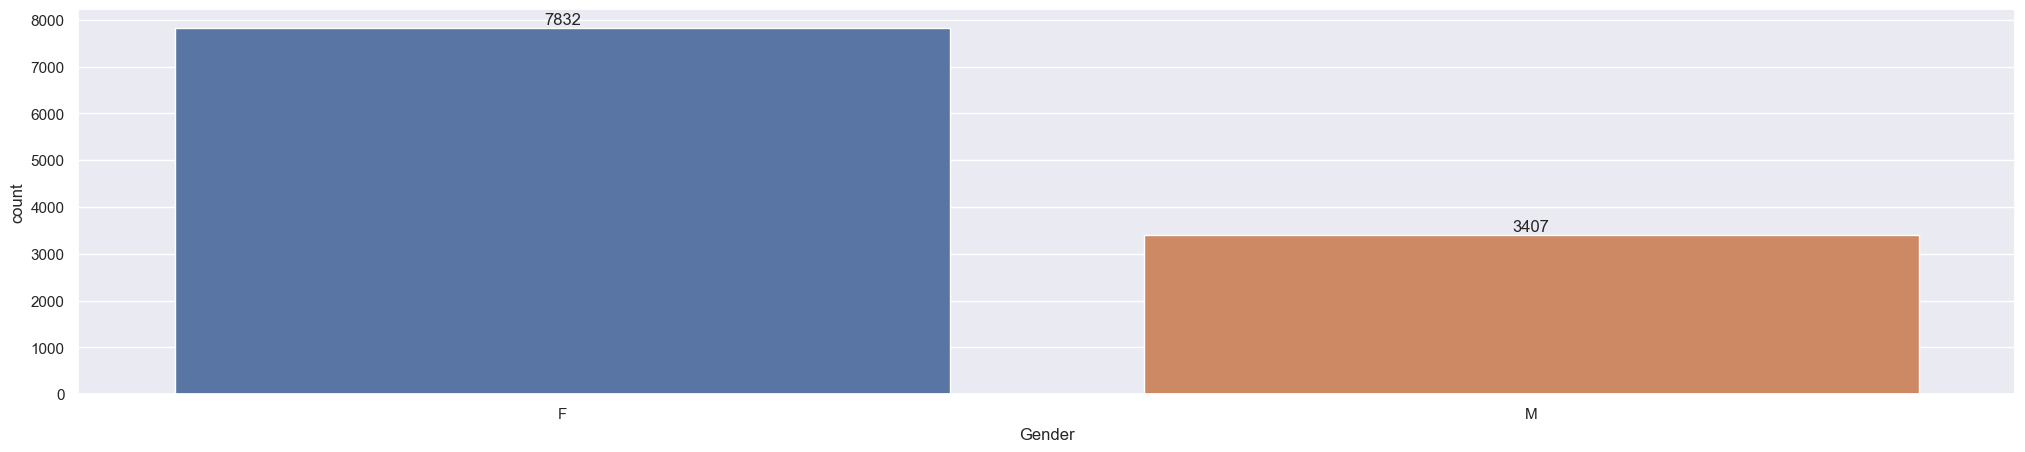

In [223]:
gender_dist=sns.countplot(x='Gender', data=df)

for i in gender_dist.containers:
    gender_dist.bar_label(i)

<Axes: xlabel='Gender', ylabel='Amount'>

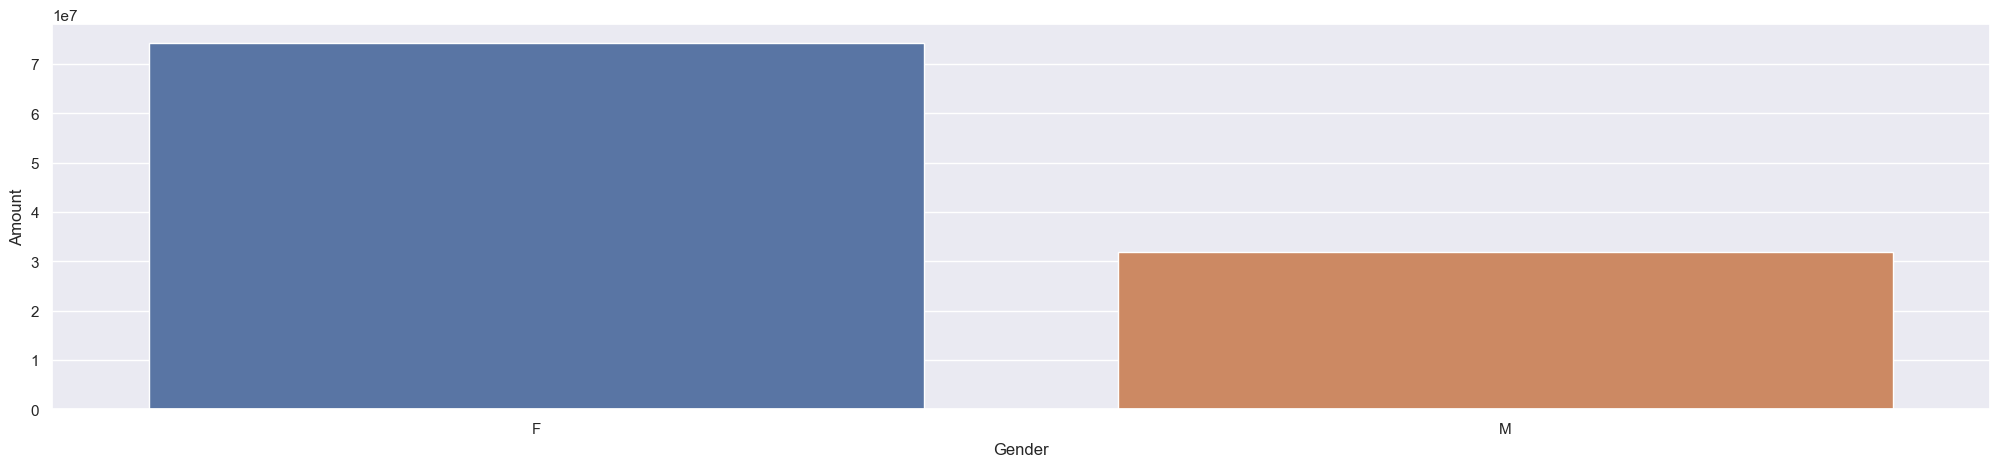

In [224]:
# Grouping the total Amount spent by each gender.
sales_gen=df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Gender',y='Amount',data=sales_gen)

Insight 1: From the above graph, we can infer that most of the buyers are females, and the purchasing power of females is greater than men.

### Age

In [225]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

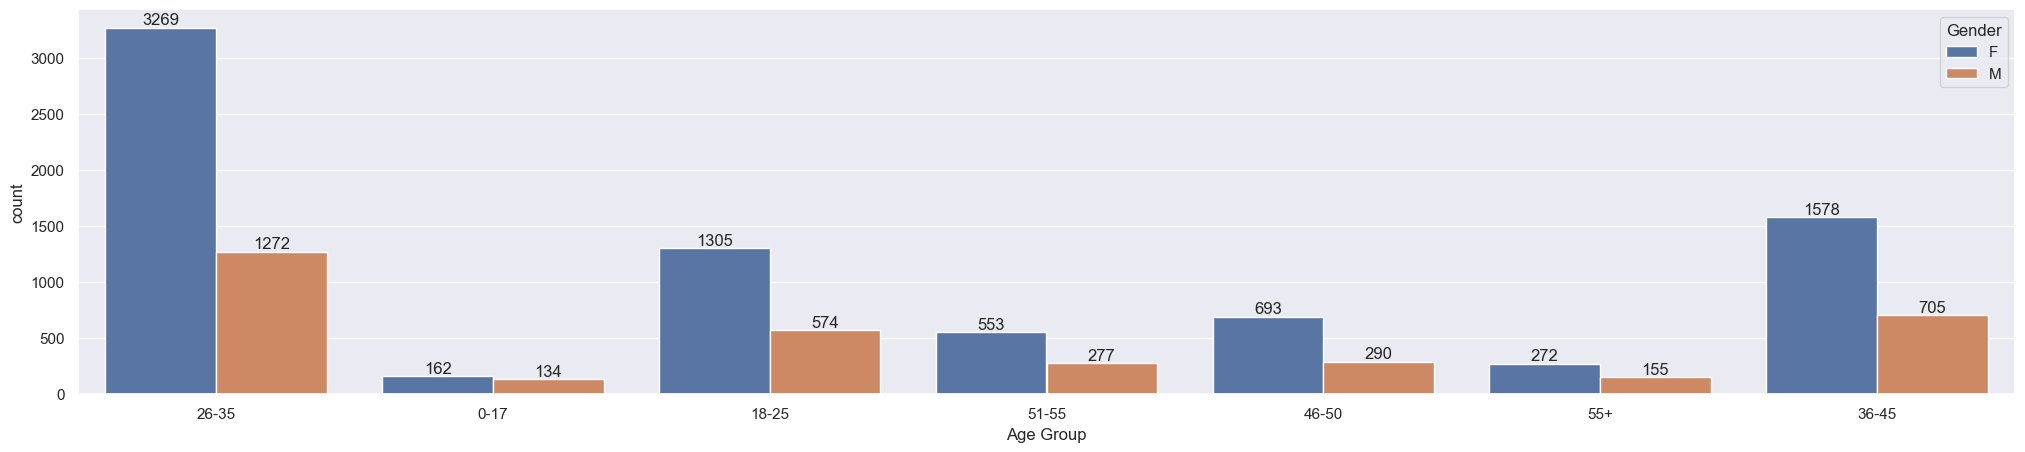

In [226]:
age_dist=sns.countplot(x='Age Group', data=df, hue='Gender')

for i in age_dist.containers:
    age_dist.bar_label(i)

<Axes: xlabel='Age Group', ylabel='Amount'>

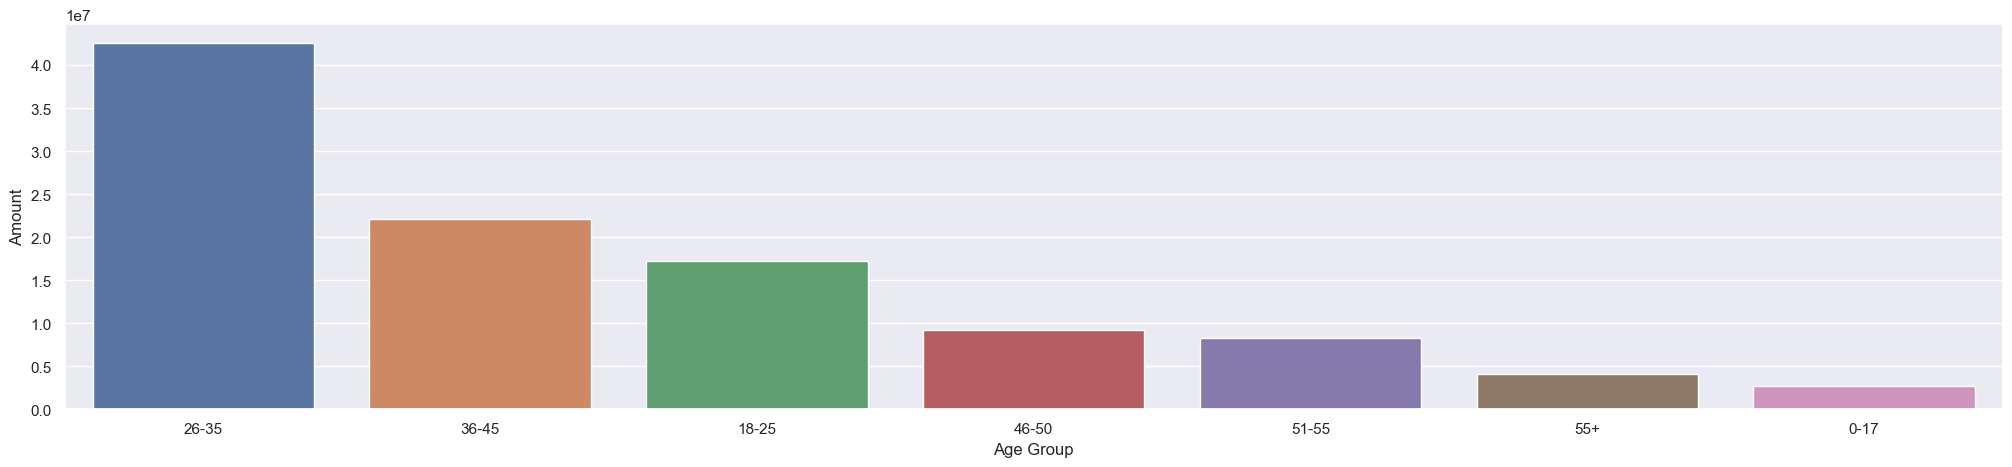

In [227]:
# Grouping the total Amount spent by each Age Group.
sales_age=df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Age Group',y='Amount',data=sales_age,)

Insight 2: From above graph, we can infer that most of the buyers belong to the age group of 26-35, and are predominantly females.

### State

In [228]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

<Axes: xlabel='State', ylabel='Orders'>

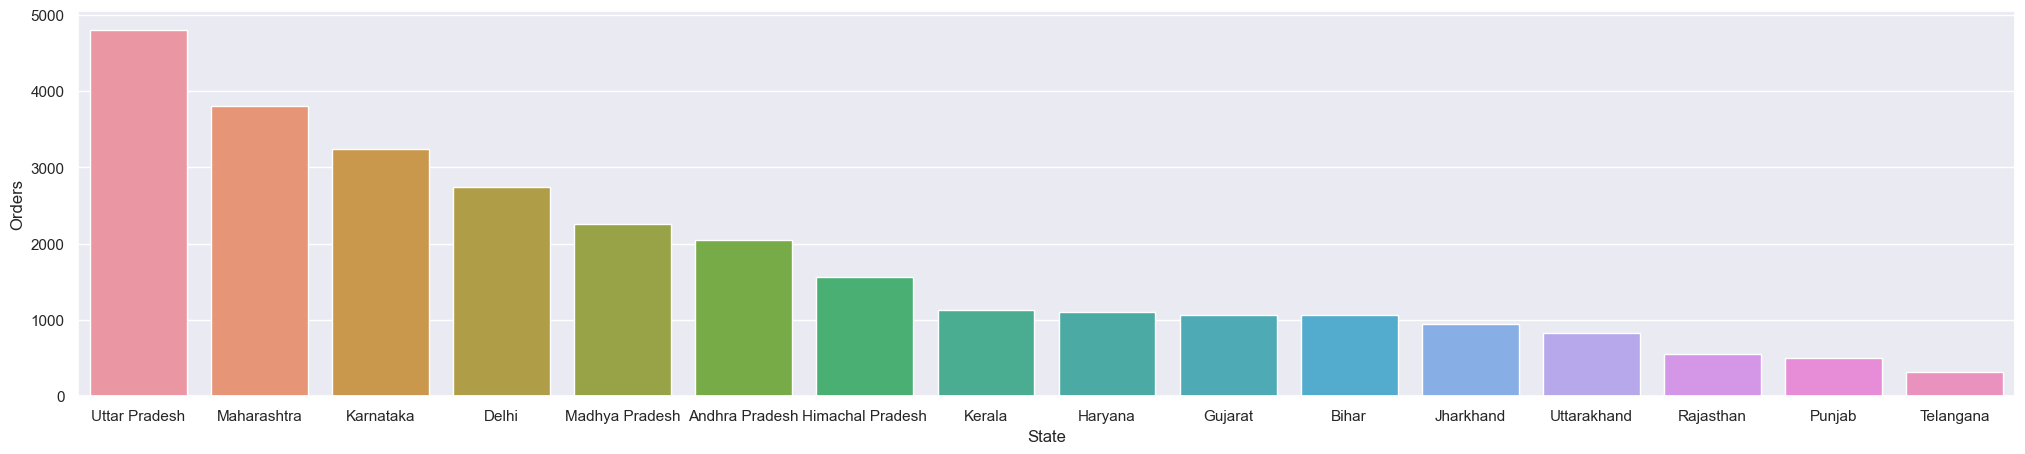

In [229]:
# Grouping the total Orders placed by each State.
sales_state=df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False)
sns.set(rc={'figure.figsize':(25,5)})
sns.barplot(x='State',y='Orders',data=sales_state,)

<Axes: xlabel='State', ylabel='Amount'>

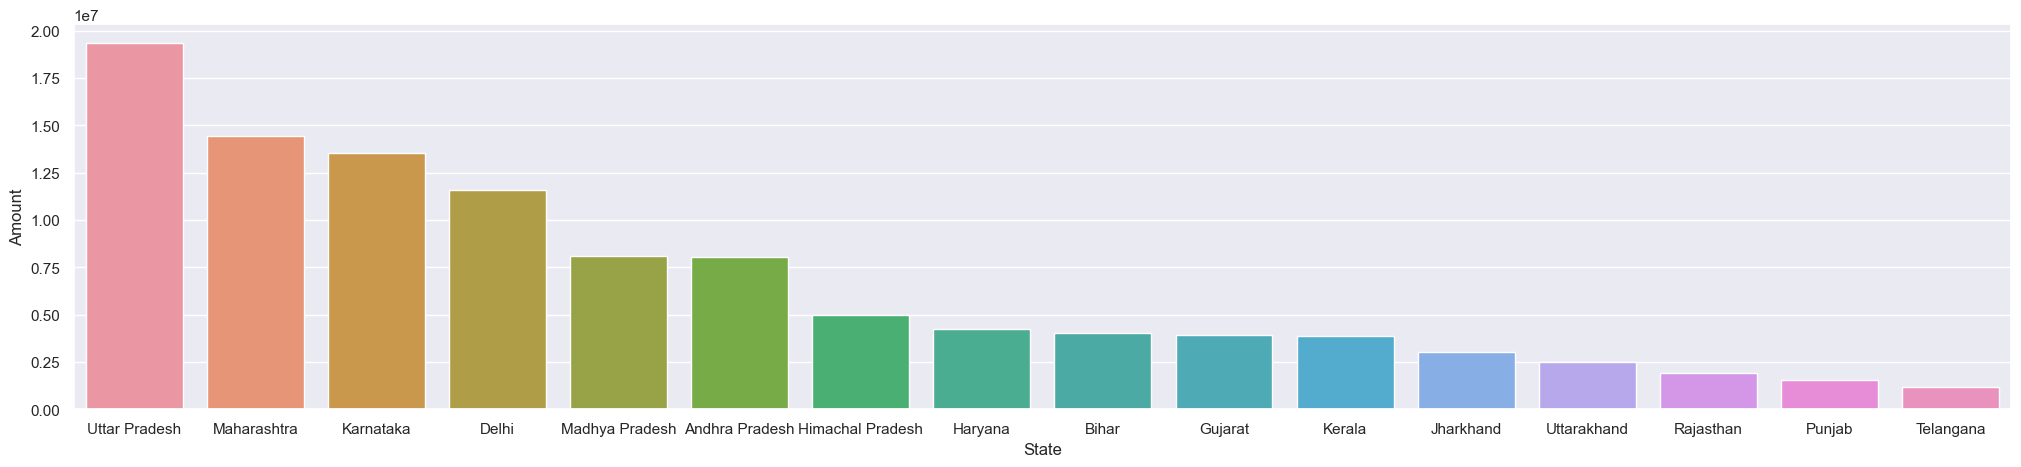

In [230]:
# Grouping the total Amount spent by each State.
sales_state=df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.set(rc={'figure.figsize':(25,5)})
sns.barplot(x='State',y='Amount',data=sales_state,)

Insight 3: From the above graphs, we can infer that most of the Orders & total Sales/Amount are from Uttar Pradesh, Maharashtra and karnataka respectively.

### Marital Status

In [231]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

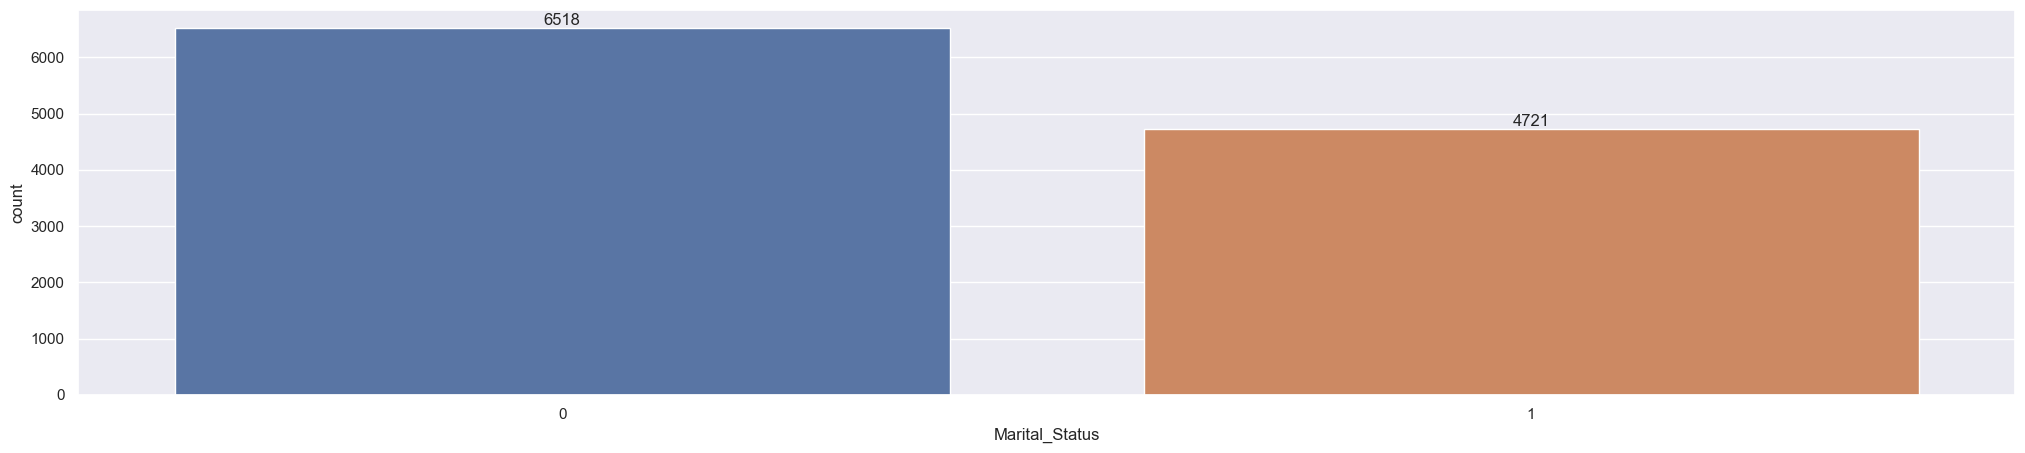

In [232]:
marital_dist=sns.countplot(x='Marital_Status', data=df)
sns.set(rc={'figure.figsize':(5,5)})
for i in marital_dist.containers:
    marital_dist.bar_label(i)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

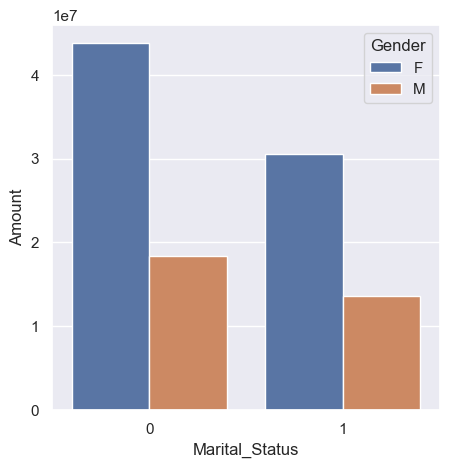

In [233]:
# Grouping the total Amount spent by Married/Un-married people.
amount_by_marital=df.groupby(['Marital_Status','Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Marital_Status',y='Amount',data=amount_by_marital, hue='Gender')

Insight 4: From the above graphs, we can infer that the top buyers are un-married (women) and they have high purchasing power. Married (women) come 2nd in terms of shopping and purchasing power.

### Occupation

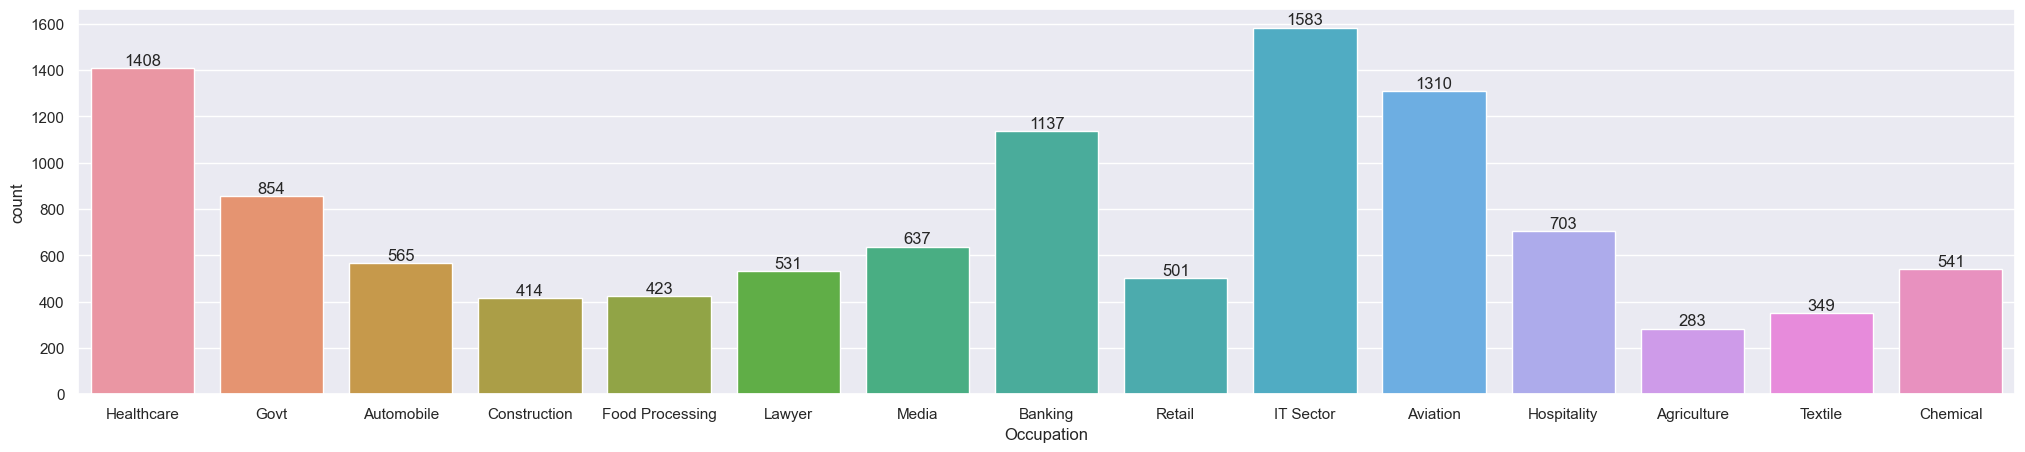

In [234]:
sns.set(rc={'figure.figsize':(25,5)})
occupation_dist=sns.countplot(x='Occupation',data=df)
for i in occupation_dist.containers:
    occupation_dist.bar_label(i)

<Axes: xlabel='Occupation', ylabel='Amount'>

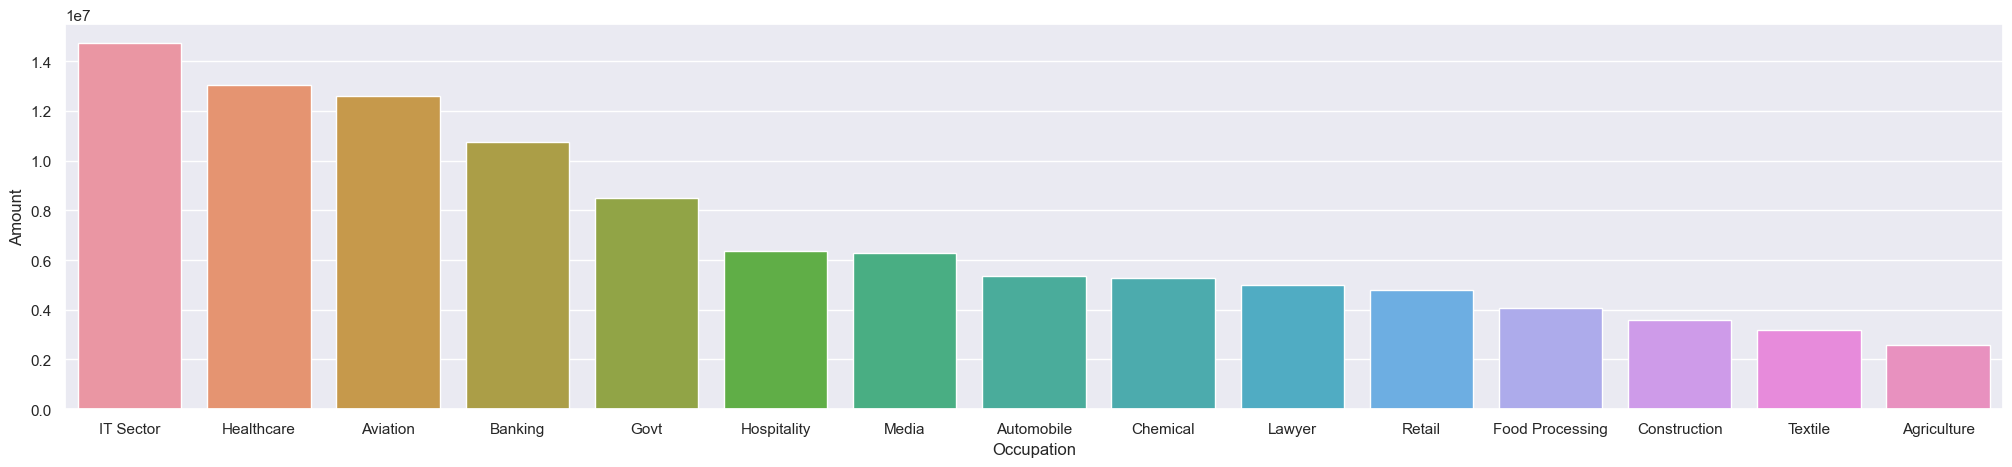

In [235]:
# Grouping the total Amount spent by people from different Occupations.
amount_by_occupation=df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x='Occupation',y='Amount',data=amount_by_occupation)

Insight 5: From the above graphs, we can infer that most of the buyers are working in IT, Healthcare, and Aviation sector.

### Product Category

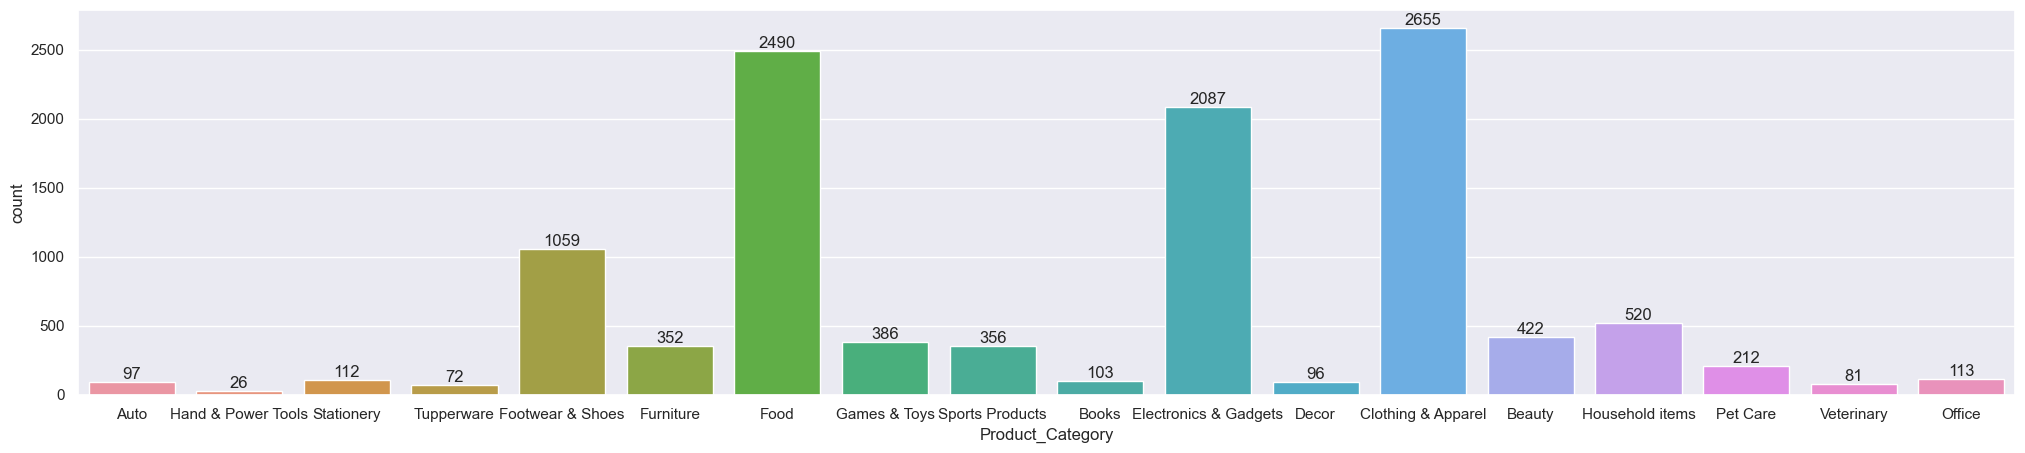

In [236]:
product_dist=sns.countplot(x='Product_Category',data=df)
for i in product_dist.containers:
    product_dist.bar_label(i)

<Axes: xlabel='Product_Category', ylabel='Amount'>

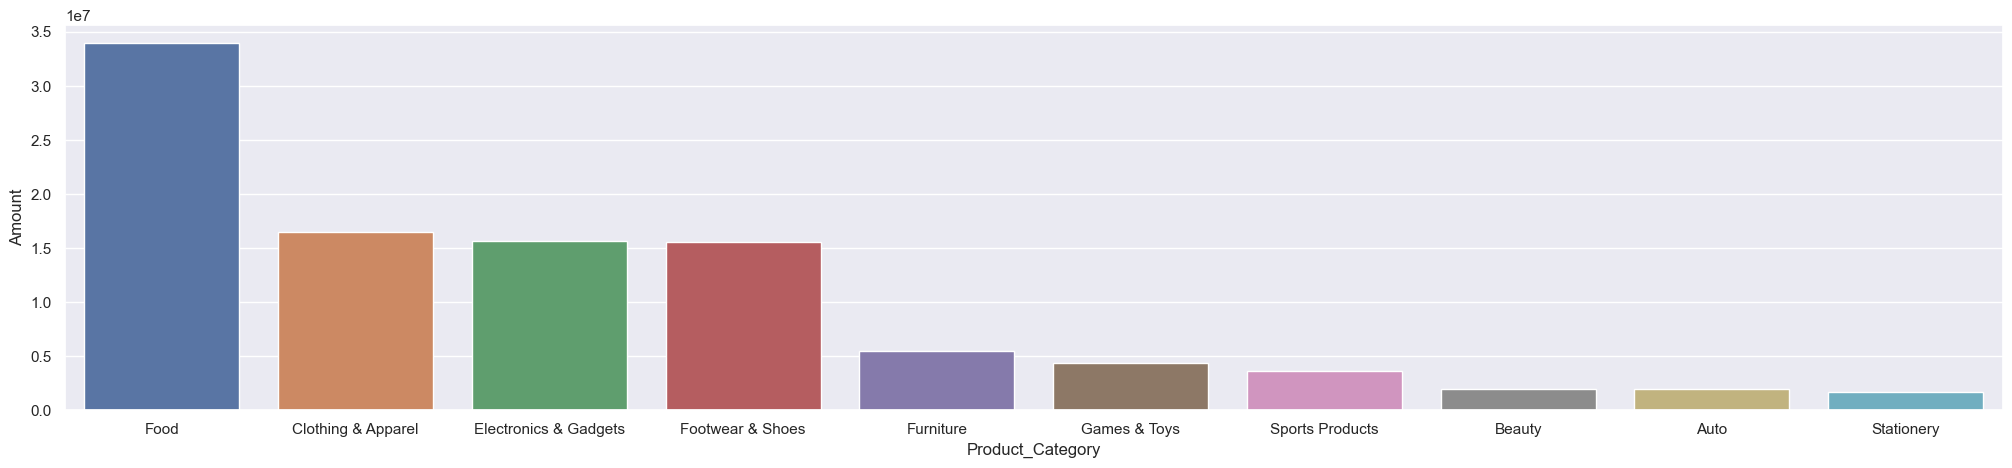

In [237]:
# Grouping the total Amount spent by people on different Products.
amount_by_product=df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sns.barplot(x='Product_Category',y='Amount',data=amount_by_product)

Insight 6: From the above graphs, we can infer that most of the products sold are from Food, Clothing & apparel, and Electronics categories. 

## Conclusion

 Married women from Uttar Pradesh, Maharashtra and Karnataka working in the fields of IT, Healthcare and Aviation and who belong to age group 26-35 yrs are more likely to buy products from Food, Clothing and Electronics categories.

# Project Learnings
* Performed data cleaning and manipulation.
* Performed exploratory data analysis using Numpy, Pandas and Seaborn.
* Improved customer experience by identifying potential customers across different states, occupations, genders and age groups.
* Improved sales by identifying most selling product categories and products, which can help to plan inventory and hence meet demands.